# Table of Contents

  1. [Imports/Wrangling](#impo)
  
  2. [Correlations](#corr)
      - [Scatterplots for Hypotheses](#corr1)
      - [Scatterplots for Other Four Factors](#corr2)
      
  3. [Hypotheses](#hypo)
      - [T-test tables](#hypo1)
      - [Bar graphs with error bars](#hypo2)
      
  4. [Conclusion](#conc)

## Imports/Wrangling

The main dataframe is downloaded from Kaggle.com, which is the world happiness report for 2021.  The data is based on the
results from 2020.  The original dataframe is then modified to keep the following columns:

Link:[World Happiness Report 2021](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021)

- Country Name (name of country)
- Ladder Score (Composite score based on the following six factors, based from 0-10)
- Logged GDP per capita (Natural log of a country's GDP per capita - Will exponentiate this value to show actual GDP values)
- Social support (Average social support ranging from 0 to 1, values closer to 1 represent more social support from friends and family)
- Healthy life expectancy (Shows average age a citizen can live to in that country)
- Freedom to make life choices (Scored from 0 to 1, values closer to 1 represent more freedom)
- Generosity (ranging from -1 to 1, negative values represent people taking while positive values show more giving)
- Perceptions of corruption (ranging from 0 to 1, values closer to 1 people have a higher perception of governmental corruption)


In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
# import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

In [4]:
#loading in main dataframe

#df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/python_for_data_analysis_thinkful/world-happiness-report-2021.csv')
df = pd.read_csv('world-happiness-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [5]:
# looking at columns and datatypes in dataframe using info() method

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [6]:
#using shape attribute to get size of dataframe

df.shape

(149, 20)

In [45]:
#looping through each of the columns and selecting the columns I want to use for analysis
#then assigning df_modified to the dataframe with the filtered column list

column_list = []
for i,j in enumerate (df.columns):
    if i == 0 or i == 2:
        column_list.append(j)
    elif i >= 6 and i <= 11:
        column_list.append(j)
df_modified = df[column_list]

In [48]:
#verfiying df_modified has the filtered columns and the first five rows

from IPython.display import display, HTML
display(HTML(df_modified.to_html(index=False)))
df_modified.head(5)

Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Finland,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
Denmark,7.620,10.933,0.954,72.700,0.946,0.030,0.179
Switzerland,7.571,11.117,0.942,74.400,0.919,0.025,0.292
Iceland,7.554,10.878,0.983,73.000,0.955,0.160,0.673
Netherlands,7.464,10.932,0.942,72.400,0.913,0.175,0.338
Norway,7.392,11.053,0.954,73.300,0.960,0.093,0.270
Sweden,7.363,10.867,0.934,72.700,0.945,0.086,0.237
Luxembourg,7.324,11.647,0.908,72.600,0.907,-0.034,0.386
New Zealand,7.277,10.643,0.948,73.400,0.929,0.134,0.242
Austria,7.268,10.906,0.934,73.300,0.908,0.042,0.481


,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [49]:
#renaming 'Logged GDP per capita column to GDP per capita'
#next line will use numpy's exp method to exponentiatiate the values in the column to show per capita income for each country

df_modified = df_modified.rename(columns={'Logged GDP per capita':'GDP per capita'})
df_modified['GDP per capita'] = np.exp(df_modified['GDP per capita'])

In [56]:
#verifying conversion
df_modified['GDP per capita'] = df_modified['GDP per capita'].round(2)
display(HTML(df_modified.to_html(index=False)))
#df_modified.head()

Country name,Ladder score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Finland,7.842,47810.47,0.954,72.000,0.949,-0.098,0.186
Denmark,7.620,55994.01,0.954,72.700,0.946,0.030,0.179
Switzerland,7.571,67305.69,0.942,74.400,0.919,0.025,0.292
Iceland,7.554,52997.50,0.983,73.000,0.955,0.160,0.673
Netherlands,7.464,55938.04,0.942,72.400,0.913,0.175,0.338
Norway,7.392,63133.07,0.954,73.300,0.960,0.093,0.270
Sweden,7.363,52417.72,0.934,72.700,0.945,0.086,0.237
Luxembourg,7.324,114347.80,0.908,72.600,0.907,-0.034,0.386
New Zealand,7.277,41898.28,0.948,73.400,0.929,0.134,0.242
Austria,7.268,54502.40,0.934,73.300,0.908,0.042,0.481


## Correlations
<a id='corr'></a>

The following section will graph each of the six factors illustrating the correlation coefficient for each factor.  Next, it will show scatterplots showing scatterplots for the two hypotheses that will be tested as well as the other four factors.

In [11]:
#this block will generate two empty lists then iterate through the column names only comparing the latter six columns
#to the ladder score, append the column name and the coefficient value,
#and display the pearson correlation coefficient to that respective column

pcorr_col1 = []
pcorr_col2 = []
for i,j in enumerate(df_modified.columns):
    if i >= 2:
        pcorr = df_modified['Ladder score'].corr(df_modified[j])
        pcorr_col1.append(j)
        pcorr_col2.append(pcorr)
        print (j, ':', pcorr)

GDP per capita : 0.7455827252603046
Social support : 0.7568876453635002
Healthy life expectancy : 0.7680994550105206
Freedom to make life choices : 0.6077530656580242
Generosity : -0.01779927692264075
Perceptions of corruption : -0.42113999673857866


In [12]:
#this block will take the two lists that were generated in the previous block and create the df_corr dataframe

d={'factor':pcorr_col1, 'correlation_coefficient':pcorr_col2}
df_corr = pd.DataFrame(data = d)

In [13]:
# this will sort the correlation efficients in the df_corr dataframe by descending order then reset the index value

df_corr = df_corr.sort_values('correlation_coefficient', ascending = False).reset_index(drop = True)

In [14]:
#displaying the sorted df_corr dataframe

df_corr

,factor,correlation_coefficient
0,Healthy life expectancy,0.768099
1,Social support,0.756888
2,GDP per capita,0.745583
3,Freedom to make life choices,0.607753
4,Generosity,-0.017799
5,Perceptions of corruption,-0.421140


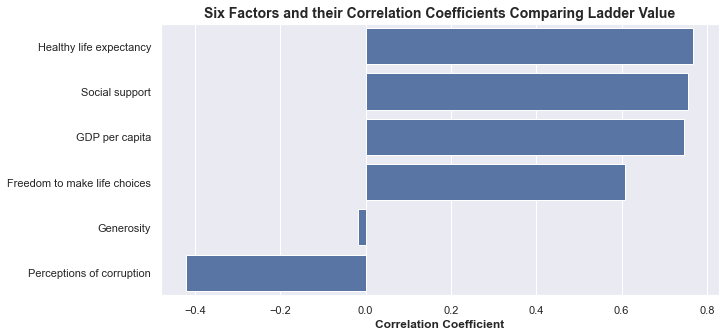

In [15]:
#setting up bar graph for each factor and its correlation coefficient

blue = sns.color_palette()[0]
plt.figure(figsize=[10,5])
sns.barplot(data=df_corr, y='factor', x='correlation_coefficient', color = blue)
plt.title('Six Factors and their Correlation Coefficients Comparing Ladder Value', weight='bold', fontsize='14')
plt.xlabel('Correlation Coefficient', weight='bold')
plt.ylabel('');

As shown above, healthy life expectancy, social support, GDP per capita, and Freedom to make life choices all have strong positive correlations.  Generosity has a slight negative correlation while perceptions of corruptions has a fair negative correlation.

### Scatterplots for Hypotheses
<a id='corr1'></a>

The first two scatterplots will illustrate the correlation between ladder score with GDP per capita and healthy life expectancy, respectively.

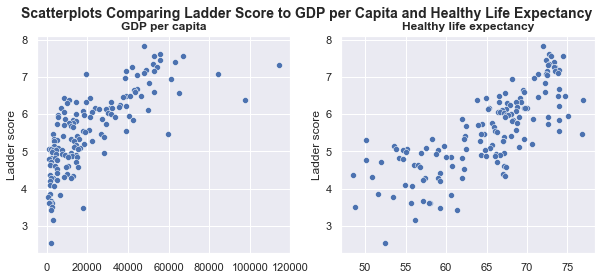

In [16]:
#scatterplots showing correlation between ladder value vs GDP per capita as well as ladder value vs healthy life expectancy
#two factors 

#function created to take in column name, create a scatterplot, and title it
def scatter(col_name):
    ax = sns.scatterplot(data = df_modified, x=col_name, y='Ladder score')
    ax.set_title(col_name, weight='bold')
    plt.xlabel('')

fig = plt.figure(figsize = [10,4])
fig.suptitle('Scatterplots Comparing Ladder Score to GDP per Capita and Healthy Life Expectancy', weight='bold', fontsize='14')

plt.subplot(1,2,1)
scatter('GDP per capita')

plt.subplot(1,2,2)
scatter('Healthy life expectancy')
#plt.subplots_adjust(wspace=0.5, hspace=0.25)


As both scatterplots show, there is a positive correlation with higher GDP per capita as well as higher life expectancy in comparison to the ladder score

### Scatterplots for Other Four Factors

<a id='corr2'></a>

The last four scatterplots will show the other four factors and how they compare to ladder score.

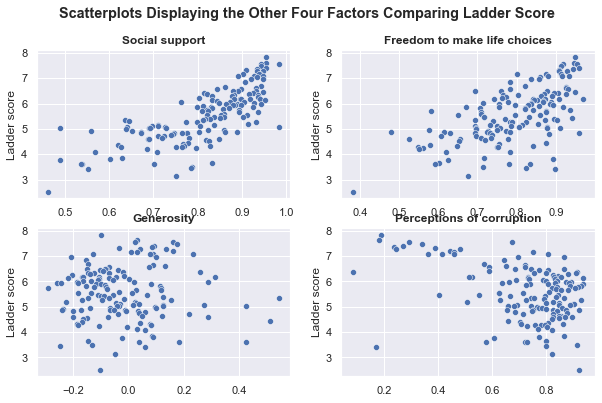

In [17]:
#scatterplots showing correlation for the other four factors

fig = plt.figure(figsize = [10,6])
fig.suptitle('Scatterplots Displaying the Other Four Factors Comparing Ladder Score', weight='bold')

plt.subplot(2,2,1)
scatter('Social support')
plt.subplot(2,2,2)
scatter('Freedom to make life choices')
plt.subplot(2,2,3)
scatter('Generosity')
plt.subplot(2,2,4)
scatter('Perceptions of corruption')
#plt.subplots_adjust(wspace=0.5, hspace=0.25)


## Hypotheses
<a id='hypo'></a>

#### Hypothesis 1: GDP per capita is a statistically significant factor in determining ladder score.
#### Hypothesis 2: Healthy life expectancy is a statistically significant factor in determining ladder score.

> $H_{0} = \mu1 - \mu2 = 0$

> $H_{a} = \mu1 - \mu2 \neq 0$

The following two blocks will create a ttest function that will take in GDP per capita and Healthy life expectancy then return a table with the base statistics to include the t-statistic, p-value, confidence interval and range from the difference in means based on mean, number of observations, and variance of each group.  The next two blocks will display the table for the two hypotheses.  The null hypothesis, $H_{0}$, will show the difference in means will be equal to zero or the confidence intervals will overlap.  The alternate hypothesis, $H_{a}$, will show the difference in means not equal to zero in the 95\% confidence interval range.

The sample size for each hypothesis will be the top 30 countries for each factor for the treatment group while the rest of the countries, the other 119, be the control group.



In [18]:
#Generating t-test list based on the following statistics used in the ttest function (self-explanatory list values)

ttest_list = ['Mean - Control', 'Variance - Control', 'Observations - Control', 'Mean - Treatment',
              'Variance - Treatment', 'Observations - Treatment', 'T-Stat', 'P-Value Two-Tail', 'T-Critical two-tail',
             'Sample Size', 'Difference in Means', 'Standard error of difference', 'Confidence Interval',
             'Lower Limit', 'Upper Limit']

In [19]:
#Function created to take in a column name and return a dataframe based on the statistics from the ttest_list
#Each section will be commented to further describe what the function is doing

def ttest(col_name):
    
    #df_hypo is created which sorts the values depending on the column name taken in descending order
    df_hypo = df_modified.sort_values(col_name, ascending = False).reset_index(drop = True)
    
    #For loop to append the top 30 ladder score values for the treatment list while the rest of the values
    #are appended to the control list.
    ls_treatment = []
    ls_control = []
    
    for i in range(df_hypo.shape[0]):
        if i < 30:
            ls_treatment.append(df_hypo['Ladder score'][i])
        else:
            ls_control.append(df_hypo['Ladder score'][i])

    #converting both lists into numpy arrays to do certain numpy math methods
    ls_treatment = np.array(ls_treatment)
    ls_control = np.array(ls_control)
    
    #hypothesis t-test comparing treatment list and control list.  The t-statistic and p-value will be assigned
    #to hypo_ttest
    hypo_ttest = stats.ttest_ind(ls_treatment, ls_control)
    
    #list constructor displaying values corresponding to the statistic from the ttest_list
    stat_list = []
    
    #function taken in either the control or treatment list then appending mean, variance, and observations (mvo) to stat_list
    def mvo(ls_list):
        mean = ls_list.mean()
        variance = ls_list.var()
        observation = len(ls_list)
        stat_list.append(mean)
        stat_list.append(variance)
        stat_list.append(observation)
        
    #appending first three values to stat list from the control list (stat_list[0,1,2])
    mvo(ls_control)
    #appending next three values to stat list from the treatment list (stat_list[3,4,5])
    mvo(ls_treatment)
    
    #appending the t-statistic and the p-value to the stat_list (stat_list[6,7])
    stat_list.append(hypo_ttest[0])
    pval = hypo_ttest[1]
    stat_list.append(pval)
    
    #appending t-critical two-tail value assuming it is 1.96 (stat_list[8])
    stat_list.append(1.96)
    
    #appending sample size, which is the sum of the observations, which is position 2 and position 5 in the stat_list
    #stat_list[9,10]
    stat_list.append(stat_list[2] + stat_list[5])

    #appending difference in means from the control and treatment lists, which is position 0 and position 3 respectively
    #then converting it to a positive value using abs() stat_list[11]
    diff_means = (stat_list[3] - stat_list[0])
    stat_list.append(diff_means)
    
    #standard error taking the variance of each then dividing it by the number of observations, adding up those quotients
    #then taking the square root of that sum stat_list[12]
    std_err = np.sqrt((stat_list[1]/stat_list[2])+(stat_list[4]/stat_list[5]))
    stat_list.append(std_err)
    
    #confidence interval multiplying standard err by 1.96 to get the confidence interval
    #then using that value to subtract and add to the difference in means to create the confidence interval range
    #stat_list[13-15]
    ci = std_err * 1.96
    stat_list.append(ci)
    stat_list.append(diff_means - ci)
    stat_list.append(diff_means + ci)
    
    #converting stat_list to string, creating ttest dataframe, then returning it
    stat_list = map(str, stat_list)
    d = {'Statistic':ttest_list, 'Values':stat_list}
    df_ttest = pd.DataFrame(data = d)
    return df_ttest

### T-test Tables
<a id='hypo1'></a>

In [20]:
#first hypothesis looking at GDP per capita and returning the dataframe from the ttest function
df_hypo_one = ttest('GDP per capita')
df_hypo_one

,Statistic,Values
0,Mean - Control,5.201689075630252
1,Variance - Control,0.7951183318974647
2,Observations - Control,119
3,Mean - Treatment,6.846399999999999
4,Variance - Treatment,0.37527404
5,Observations - Treatment,30
6,T-Stat,9.486101863988672
7,P-Value Two-Tail,6.009885456732183e-17
8,T-Critical two-tail,1.96
9,Sample Size,149


In the first table, it shows the t-statistic at 9.48 being above the critical value of 1.96 as well as the p-value being <0.05.  Therefore, the null hypothesis is rejected that GDP is not a statistically significant factor.  With 95% confidence the difference in means ranges from 1.37 to 1.91.

In [21]:
#second hypothesis looking at Healthy life expectancy and returning the dataframe from the ttest function
df_hypo_two = ttest('Healthy life expectancy')
df_hypo_two

,Statistic,Values
0,Mean - Control,5.213109243697479
1,Variance - Control,0.8158292401666549
2,Observations - Control,119
3,Mean - Treatment,6.801100000000002
4,Variance - Treatment,0.4395621566666666
5,Observations - Treatment,30
6,T-Stat,8.974656851457624
7,P-Value Two-Tail,1.2340786720044462e-15
8,T-Critical two-tail,1.96
9,Sample Size,149


In the second table, it shows the t-statistic at 8.97 while the p-value is also <0.05.  Therefore, the null hypothesis is rejected that Healthy life expectancy is not a statistically significant factor.  With 95% confidence the difference in means ranges from 1.30 to 1.87.

The other four factors are also looked at, and will go over those briefly.

In [22]:
df_three = ttest(df_modified.columns[3])
print(df_modified.columns[3])
df_three

Social support


,Statistic,Values
0,Mean - Control,5.235025210084033
1,Variance - Control,0.8660169657510062
2,Observations - Control,119
3,Mean - Treatment,6.714166666666668
4,Variance - Treatment,0.5071202055555555
5,Observations - Treatment,30
6,T-Stat,8.071843639972373
7,P-Value Two-Tail,2.272003072883378e-13
8,T-Critical two-tail,1.96
9,Sample Size,149


In [23]:
df_four = ttest(df_modified.columns[5])
print(df_modified.columns[5])
df_four

Freedom to make life choices


,Statistic,Values
0,Mean - Control,5.2894789915966385
1,Variance - Control,0.8858321823317563
2,Observations - Control,119
3,Mean - Treatment,6.498166666666667
4,Variance - Treatment,1.009090938888889
5,Observations - Treatment,30
6,T-Stat,6.158075400228748
7,P-Value Two-Tail,6.685308544340949e-09
8,T-Critical two-tail,1.96
9,Sample Size,149


In [24]:
df_five = ttest(df_modified.columns[6])
print(df_modified.columns[6])
df_five

Generosity


,Statistic,Values
0,Mean - Control,5.481126050420168
1,Variance - Control,1.1037200093213757
2,Observations - Control,119
3,Mean - Treatment,5.737966666666666
4,Variance - Treatment,1.2588971655555559
5,Observations - Treatment,30
6,T-Stat,1.1721392756454367
7,P-Value Two-Tail,0.2430372846891223
8,T-Critical two-tail,1.96
9,Sample Size,149


In [25]:
df_six = ttest(df_modified.columns[7])
print(df_modified.columns[7])
df_six

Perceptions of corruption


,Statistic,Values
0,Mean - Control,5.583705882352941
1,Variance - Control,1.1967362748393473
2,Observations - Control,119
3,Mean - Treatment,5.331066666666666
4,Variance - Treatment,0.8916421955555557
5,Observations - Treatment,30
6,T-Stat,-1.1527906210441583
7,P-Value Two-Tail,0.25086746485185973
8,T-Critical two-tail,1.96
9,Sample Size,149


Just like the two hypotheses, Social Support and Freedom to make life choices are statistically significant factors regarding the happiness index.  However, Generosity and Perceptions of Corruption are not statistically significant factors with p-values of 0.24 and 0.25, respectively.

The following are ranges for the difference in means with 95% confidence:

- Social Support: 1.17 - 1.78
- Freedom to Make Life Choices: 0.81 - 1.61
- Generosity: -0.18 - 0.70
- Perceptions of corruption: -0.64 - 0.13


### Bar Graphs with Error Bars
<a id='hypo2'></a>

The following block will create the ci_graph function which will take in a dataframe created by the ttest function above and then display a bar graph with error bars showing the control and treatment groups as well as the confidence interval.

In [35]:
#function creating bar graph with error bars taking in a hypothesis dataframe created from the ttest function
#blocks will be explained in further detail

def ci_graph(df):
    
    #converting values column in dataframe to float values
    df['Values'] = df['Values'].astype(float)
    
    #generating different lists based on the control and treatment values first three lists take values from the
    #df['Values'] column for mean, variance, and observations for both control and treatment
    group_list = ['Control', 'Treatment']
    mean_list = [df['Values'][0], df['Values'][3]]
    var_list = [df['Values'][1], df['Values'][4]]
    obs_list = [df['Values'][2], df['Values'][5]]
    
    #standard error is calculated based off of the variance and observations of the control and treatment groups
    #taking the square root of the variance divided by the square root of the number of observations 
    #then assigned to the std_err_list
    
    std_err_control = np.sqrt(df['Values'][1]/df['Values'][2])
    std_err_treatment = np.sqrt(df['Values'][4]/df['Values'][5])
    std_err_list = [std_err_control, std_err_treatment]
    
    #the confidence interval is then calculated taking each standard error value and multiplying by the t-critical
    #two-tail value of 1.96.  This result is then added to the ci_list
    ci_control = std_err_control * 1.96
    ci_treatment = std_err_treatment * 1.96
    ci_list = [ci_control, ci_treatment]
    
    #the df_ci dataframe is created based on the previous lists that were created
    d = {'Group':group_list, 'Mean':mean_list, 'Variance':var_list, 'Observations':obs_list,
        'Standard Error':std_err_list, 'Confidence Interval':ci_list}
    df_ci = pd.DataFrame(data=d)
    
    #the following creates a bar chart based on the group (x-value) and the mean(y-value) and is assigned to ax
    ax = sns.barplot(data=df_ci, x='Group', y='Mean', color=blue)
    
    #this creates the error bars for the bar graph
    x = np.array([0,1])
    plt.errorbar(x=x, y=df_ci['Mean'], yerr=df_ci['Confidence Interval'], c='black', capsize=4, fmt='none')
    
    #renames the y-axis to Happiness Score
    plt.ylabel('Happiness Score', weight='bold')
    plt.xlabel('')
    
    #returns the bar graph that was created
    return ax
    

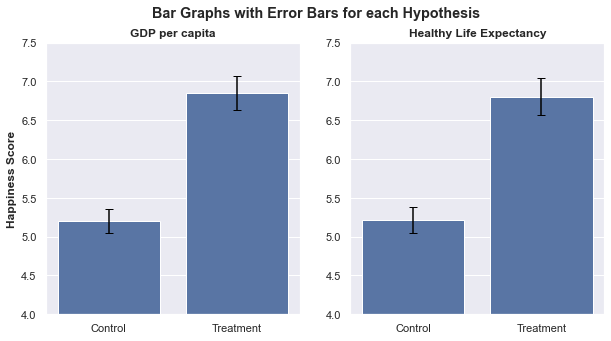

In [36]:
#creates two bar plots side-by-side comparing each hypothesis showing confidence interval error bars

fig = plt.figure(figsize=[10,5])
fig.suptitle('Bar Graphs with Error Bars for each Hypothesis', weight='bold')

plt.subplot(1,2,1)
ax1 = ci_graph(df_hypo_one)
ax1.set_title('GDP per capita', weight='bold')
ax1.set_ylim(ymin=4)
ytick = np.arange(4, 8, 0.5)
plt.xlabel('')
plt.yticks(ytick)

plt.subplot(1,2,2)
ax2 = ci_graph(df_hypo_two)
ax2.set_title('Healthy Life Expectancy', weight='bold')
ax2.set_ylim(ymin=4)
plt.yticks(ytick)
plt.xlabel('')
plt.ylabel('');

#plt.subplots_adjust(wspace=0.5, hspace=0.25)

As illustrated above, the error bars do not overlap also proving that we can reject the null hypothesis.

The final four factors will be illustrated below.

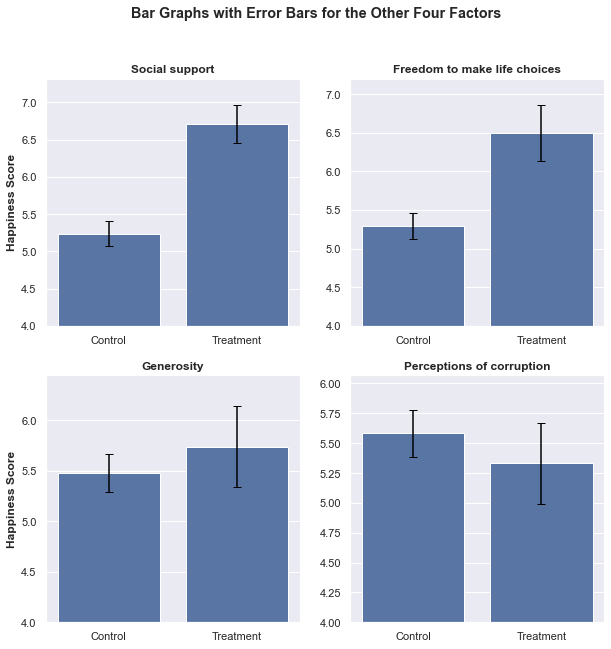

In [41]:
fig = plt.figure(figsize=[10,10])
fig.suptitle('Bar Graphs with Error Bars for the Other Four Factors', weight='bold')

plt.subplot(2,2,1)
ax3 = ci_graph(df_three)
ax3.set_title(df_modified.columns[3], weight='bold')
ax3.set_ylim(ymin=4)

plt.subplot(2,2,2)
ax4 = ci_graph(df_four)
ax4.set_title(df_modified.columns[5], weight='bold')
plt.ylabel('')
ax4.set_ylim(ymin=4)

plt.subplot(2,2,3)
ax5 = ci_graph(df_five)
ax5.set_title(df_modified.columns[6], weight='bold')
ax5.set_ylim(ymin=4)

plt.subplot(2,2,4)
ax6 = ci_graph(df_six)
ax6.set_title(df_modified.columns[7], weight='bold')
plt.ylabel('')
ax6.set_ylim(ymin=4);

#plt.subplots_adjust(wspace=0.5, hspace=0.25)

These graphs also show that Generosity and Perceptions of corruption have error bars that overlap, therefore not statistically significant.  Social support and Freedom to make life choices are statistically significant like GDP per capita and Healthy life expectancy.

## Conclusion
<a id='conc'></a>

Both GDP per capita as well as healthy life expectancy are both significant factors influencing a country's ladder score.  Both factors show strong correlations with the ladder score.  Also, looking at the t-statistic as well as p-value validated that these two factors are statistically significant.  Finally, graphing both GDP per capita as well as healthy life expectancy illustrated that there is no overlap in the error bars.

One can also look at freedom to make life choices as well as social support as strong indicators that can influence a country's happiness index.  While generosity and perceptions of corruption can impact the ladder score, this sample showed that these two factors are not statistically significant in regards to the happiness index.

Finally, the happiness index can be useful for people looking to visit or relocate as well as if one is curious to see if people are happy in general in that particular country.  